In [63]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Leer archivo bosch_aic_datathon_limpio.csv
data = pd.read_csv("bosch_aic_datathon_limpio.csv")

data.head()

,POSICIÓN,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,...,EDAD,¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?,ESTADO CIVIL,HIJOS,Distancia,TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA,TIENE HIJOS,TIPO DE RENUNCIA,Latitud,Longitud
0,POS514,LOG,S6,Exempt,32520,OTRO EMPLEO,E3,2023-01-02,ADMINIST,2018-06-21,...,31,NaN,Soltero,0,10815.468874,Menos de 1 Año,No,DESPIDO,31.619625,-106.454475
1,POS1745,MFS,S5,Direct,32217,OTRO EMPLEO,DNO,2023-01-03,ADMINIST,2017-07-20,...,25,10+ Years,Soltero,0,18258.464034,10+ Años,No,DESPIDO,31.630600,-106.541467
2,POS1230,VS7,S5,Direct,32600,OTRO EMPLEO,DNO,2023-01-03,JT012324,2019-08-29,...,23,10+ Years,Soltero,0,18460.211303,10+ Años,No,DESPIDO,31.552300,-106.497150
3,POS1661,MFS,S5,Direct,32575,ESTUDIOS,DO,2023-01-03,JT012324,2022-11-03,...,18,10+ Years,Soltero,0,6025.403146,10+ Años,No,DESPIDO,31.615350,-106.381063
4,POS1921,MFS,S5,Direct,32575,CAMBIO DE DOMICILIO,DO,2023-01-03,JT012324,2017-03-02,...,26,10+ Years,Soltero,0,6025.403146,10+ Años,No,DESPIDO,31.615350,-106.381063


In [65]:
# Distribución de Categorías Salariales por Género
df = data[['BANDA', 'SEXO']]
conteo_banda = df.groupby(['SEXO', 'BANDA']).size().reset_index(name='conteo')
fig = px.bar(conteo_banda, x='BANDA', y='conteo', color='SEXO', 
             barmode='group', 
             title='Distribución de Categorías Salariales por Género',
             labels={'conteo': 'Frecuencia', 'BANDA': 'Categoría Salarial'})

fig.show()

In [66]:
df = data[['BANDA', 'SEXO']]
conteo_banda = df.groupby(['SEXO', 'BANDA']).size().reset_index(name='conteo')
fig = px.bar(conteo_banda, x='BANDA', y='conteo', color='SEXO', 
             barmode='group', 
             title='Distribución de Categorías Salariales por Género',
             labels={'conteo': 'Frecuencia', 'BANDA': 'Categoría Salarial'})
fig.show()


In [67]:
df = data[['AREA', 'SEXO']]
conteo_area = df.groupby(['SEXO', 'AREA']).size().reset_index(name='conteo')
fig = px.bar(conteo_area, x='conteo', y='AREA', color='SEXO', 
             barmode='group', 
             title='Distribución de Categorías de Áreas por Género',
             labels={'conteo': 'Frecuencia', 'AREA': 'Categoría de Área'})
fig.show()


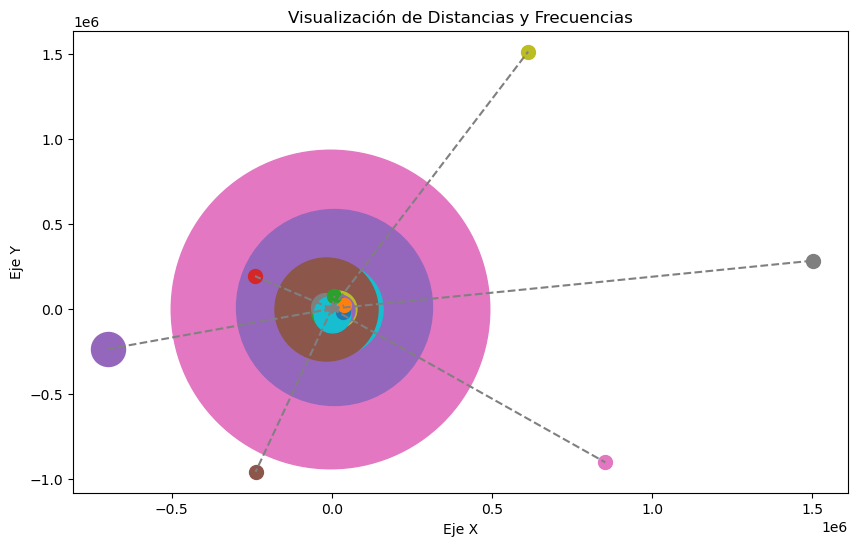

In [68]:
distancias = np.array(data['Distancia'])
valores, frecuencias = np.unique(distancias, return_counts=True)
plt.figure(figsize=(10, 6))
for i in range(len(valores)):
    plt.scatter(x=np.cos(i)*valores[i], y=np.sin(i)*valores[i], s=frecuencias[i]*100, label=f'{valores[i]}: {frecuencias[i]}')
plt.scatter(0, 0, color='red', s=10)
for i in range(len(valores)):
    plt.plot([0, np.cos(i)*valores[i]], [0, np.sin(i)*valores[i]], color='grey', linestyle='--')
plt.title('Visualización de Distancias y Frecuencias')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()




In [69]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en la media de las coordenadas
lat_promedio = data['Latitud'].mean()
lon_promedio = data['Longitud'].mean()
mapa = folium.Map(location=[lat_promedio, lon_promedio], zoom_start=6)

# Filtrar los datos para eliminar posibles valores nulos en latitud y longitud
data_filtrada = data.dropna(subset=['Latitud', 'Longitud'])

# Preparar los datos para el mapa de calor, deben ser una lista de [lat, lon]
datos_mapa_calor = data_filtrada[['Latitud', 'Longitud']].values.tolist()

# Crear y añadir el mapa de calor al mapa base
HeatMap(datos_mapa_calor).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('distribucion_empleados_mapa_calor.html')

# Mostrar el mapa si estás en Jupyter Notebook
mapa


In [70]:
conteo_sexo = data['SEXO'].value_counts().reset_index()
conteo_sexo.columns = ['SEXO', 'conteo']
fig = px.bar(conteo_sexo, x='SEXO', y='conteo',
             title='Distribución por Género',
             labels={'conteo': 'Frecuencia', 'SEXO': 'Género'})
fig.show()


In [71]:
fig = px.histogram(data, x='EDAD', nbins=10, 
                   title='Distribución de Edad',
                   labels={'EDAD': 'Edad'},
                   marginal='box')  # Puedes quitar 'marginal' si no deseas el diagrama de caja
fig.show()


In [72]:
conteo_estado_civil = data['ESTADO CIVIL'].value_counts().reset_index()
conteo_estado_civil.columns = ['ESTADO CIVIL', 'conteo']
fig = px.bar(conteo_estado_civil, x='ESTADO CIVIL', y='conteo',
             title='Distribución por Estado Civil',
             labels={'conteo': 'Frecuencia', 'ESTADO CIVIL': 'Estado Civil'})
fig.show()


In [73]:
conteo_hijos = data['HIJOS'].value_counts().reset_index()
conteo_hijos.columns = ['HIJOS', 'conteo']
fig = px.bar(conteo_hijos, x='HIJOS', y='conteo',
             title='Distribución del Número de Hijos',
             labels={'conteo': 'Frecuencia', 'HIJOS': 'Número de Hijos'})
fig.show()


In [74]:
conteo_banda_tipo = data.groupby(['BANDA', 'TIPO DE RENUNCIA']).size().reset_index(name='conteo')
fig1 = px.bar(conteo_banda_tipo, x='BANDA', y='conteo', color='TIPO DE RENUNCIA', title='BANDA vs. TIPO DE RENUNCIA')
fig1.show()


In [75]:
conteo_banda_motivo = data.groupby(['BANDA', 'MOTIVO DE LA RENUNCIA']).size().reset_index(name='conteo')
fig2 = px.bar(conteo_banda_motivo, x='BANDA', y='conteo', color='MOTIVO DE LA RENUNCIA', title='BANDA vs. MOTIVO DE LA RENUNCIA')
fig2.show()


In [76]:
data['ALTA'] = pd.to_datetime(data['ALTA'], errors='coerce')
data['BAJA'] = pd.to_datetime(data['BAJA'], errors='coerce')
data['Trimestre Alta'] = data['ALTA'].dt.to_period('Q').astype(str)
data['Trimestre Baja'] = data['BAJA'].dt.to_period('Q').astype(str)
contrataciones_por_trimestre = data['Trimestre Alta'].value_counts().reset_index()
contrataciones_por_trimestre.columns = ['Trimestre', 'Contrataciones']
fig1 = px.bar(contrataciones_por_trimestre, x='Trimestre', y='Contrataciones',
              title='Contrataciones por Trimestre')
fig1.show()
bajas_por_trimestre = data['Trimestre Baja'].value_counts().reset_index()
bajas_por_trimestre.columns = ['Trimestre', 'Bajas']
fig2 = px.bar(bajas_por_trimestre, x='Trimestre', y='Bajas',
              title='Bajas por Trimestre')
fig2.show()
